# Email Marketing Campaigns Optimization Model with NLP


### Jupyter Notebook 6/10

#### Importing Classes from the module `campaigns`

In [1]:
import sys
sys.path.append('..')


import warnings
warnings.filterwarnings('ignore')

# Get files
from campaigns.getinputdata import LanguageFileGetInfo

# Texts Preprocessing with NLP
from campaigns.modeling.nlp import StopWordsRemover

# Exploratory Analysis
from campaigns.texteda import CorporaExploratory, NGramsExploratory

# Stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielaperezduro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielaperezduro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### 4.2.4.2. Getting the selected language file

- We will start with the language with the greatest number of observations in our file.

In [2]:
# Creating an instance

spanish = LanguageFileGetInfo(dataroot='../../../datasets/output/sample_01/output_05', datafile='es.csv')

spanish.language_df.dropna(subset=['clean_message'], inplace=True)

print('Spanish: ', spanish.language_df.shape)

Spanish:  (79676, 15)


#### 4.2.4.3. NLP Exploratory Data Analysis of  `campaigns` texts

#### Removing stopwords

In [3]:
# Creating an instance

spanish_sw = StopWordsRemover(spanish.language_df, 'spanish')

In [4]:
spanish_sw.remove_stopwords()

In [5]:
#ngrams_list = []
#spanish_sw.add_ngrams_to_file(ngrams_list)

In [6]:
irrelevant_list = spanish_sw.get_ngrams_from_file()

In [7]:
#irrelevant_list

In [8]:
spanish_sw.remove_ngrams(irrelevant_list)

#### Saving file

In [11]:
spanish_sw.save_final_df('../../../datasets/output/sample_01/output_06/', 'es.csv')

#### Observing each category corpus after having removed noisy phrases and stopwords

In [12]:
# Obtaining input

spanish = LanguageFileGetInfo(dataroot='../../../datasets/output/sample_01/output_06/', datafile='es.csv')

In [13]:
# Creating an instance and observing the number of labeled messages by sector

spanish_corp = CorporaExploratory(spanish.language_df)
len(spanish_corp.labeled)

Getting labeled messages
Tokenizing messages
Removing empty tokens
Filtering by verticals: media, ecommerce, nonprofit, education, wellness, finance, architecture, government, technology, leisure, entertainment, legal, catering and association
Getting vertical corpora


9963

In [14]:
print(spanish_corp.ecommerce.shape)
print(len(spanish_corp.ecommerce_corpus))

(1608, 15)
13549


In [15]:
spanish_corp.labeled['sector'].value_counts()

Medios de comunicación, marketing y publicidad      1764
Ecommerce                                           1608
Sin ánimo de lucro                                  1482
Educación y empleo                                  1385
Salud, bienestar y cuidado personal                  630
Negocios, finanzas y banca                           569
Arquitectura, construcción y sector inmobiliario     503
Ordenadores, electrónica y tecnología móvil          459
Órganos de gobierno                                  450
Ocio, turismo y experiencias                         434
Entretenimiento, eventos y relaciones públicas       357
Legal y seguros                                      165
Restauración                                         117
Asociación cultural o religiosa                       40
Name: sector, dtype: int64

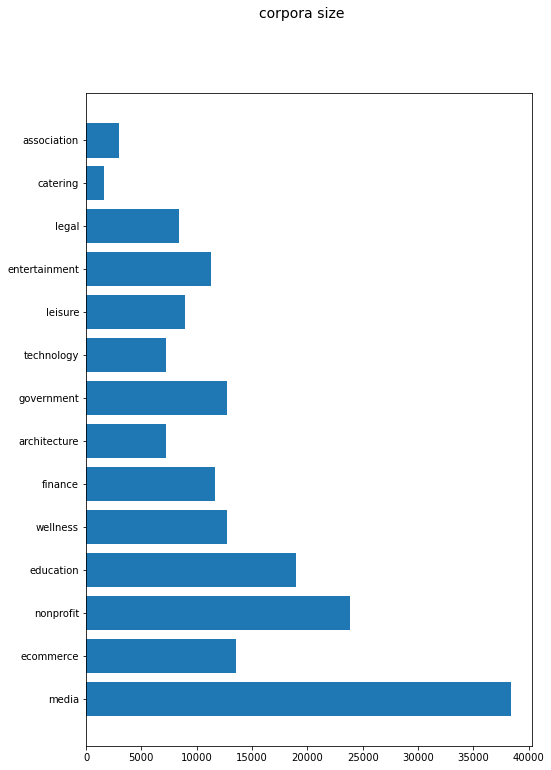

In [16]:
spanish_corp.plot_corpora_size()

#### Getting most relevant words from our corpora

In [17]:
# Create an instance

spanish_ngrms = NGramsExploratory(spanish_corp.language_df)

Getting labeled messages
Tokenizing sentences
Filtering by verticals: media, ecommerce, nonprofit, education, wellness, finance, architecture, government, technology, leisure, entertainment, legal, catering and association


In [18]:
#spanish_ngrms.get_ngrams(spanish_ngrms.ecommerce, 4, most_common=3)